# Робота з графічними інструментами Opencv

У даній лабораторній роботі розглянуто наступний графічний функціонал бібліотеки OpenCV:
1. Побудова двомірних графіків.
2. Побудова контурів об'єкта.

## Імпорт бібліотек та пакетів

In [67]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Функція для відображення зображень

Для зручного виклику відображення зображень, напишемо функцію:

In [68]:
def imshow(img):
    plt.figure(figsize=(10, 10))
    plt.imshow(img, cmap='gray')
    plt.show();

### Створимо чорне зображення розміром 512 х 512 пікселів

In [69]:
img = np.zeros((512,512,3), np.uint8)

### Лінія

### Функція
Друкує відрізок лінії, що з'єднує дві точки
### Синтаксис функції
   cv2.line(img, pt1, pt2, color, thickness)
   
Параметри:
* **img** – Вихідне зображення.
* **pt1** – Перша точка.
* **pt2** – Друга точка.
* **color** – Колір лінії.
* **thickness** – Товщина лінії.

In [ ]:
# Draw a diagonal blue line with thickness of 5 px
cv2.line(img,(0,0),(511,511),(0,0,255),5)

### Відобразимо результат

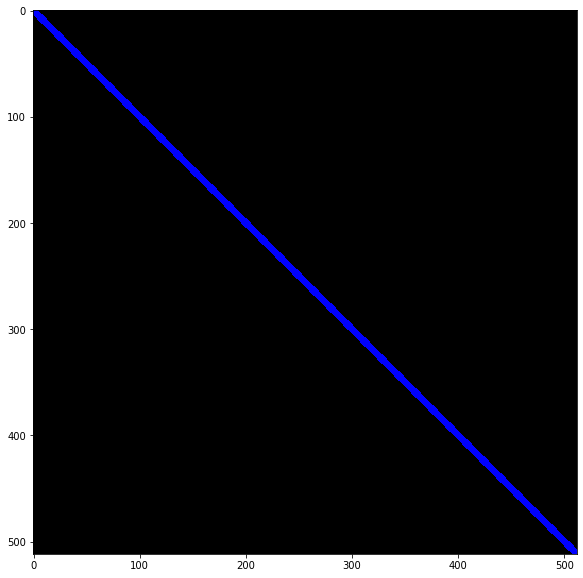

In [71]:
imshow(img)

### Коло

### Функція
Друкує відрізок лінії, що з'єднує дві точки
### Синтаксис функції
   cv2.Circle(img, center, radius, color, thickness) 
   
Параметри:
* **img** – Вихідне зображення.
* **center** – Центр кола.
* **radius** – Радіус кола.
* **color** – Колір кола.
* **thickness** – Товщина лінії кола. Якщо -1, то коло заповнюється суцільним кольором.

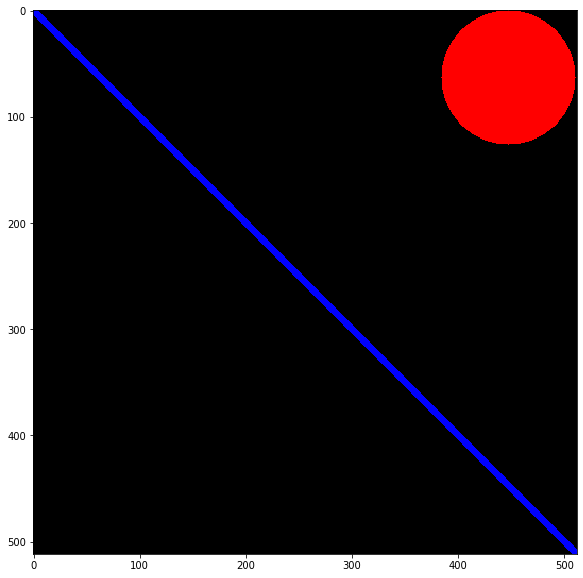

In [72]:
cv2.circle(img,(447,63), 63, (255,0,0), -1)
imshow(img)

## Еліпс

### Функція
Друкує еліпс
### Синтаксис функції
   cv.Ellipse(img, center, axes, angle, start_angle, end_angle, color, thickness) 
   
Параметри:
* **img** – Вихідне зображення.
* **center** – Центр еліпса.
* **axes** – Половина довжини осей відносно центру.
* **angle** – Кут повороту еліпса.
* **start_angle** – Стартовий кут еліптичної дуги.
* **end_angle** - Кінцевий кут еліптичної дуги.
* **color** - Колір еліпса.
* **thickness** - товщина еліпса. Якщо -1, то коло заповнюється суцільним кольором.

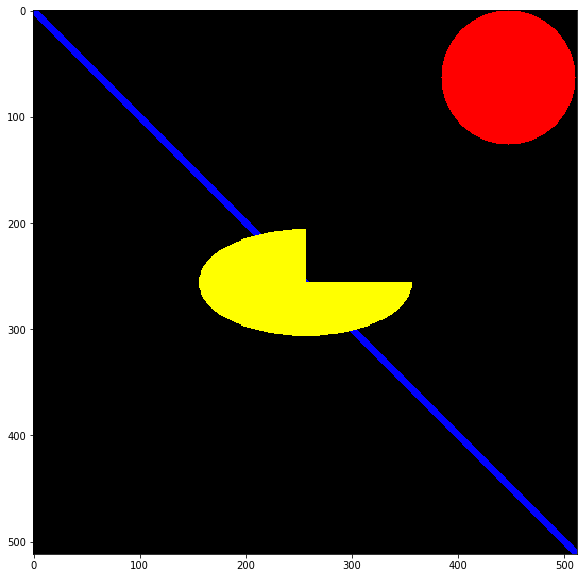

In [73]:
cv2.ellipse(img,(256,256),(100,50),0,0,270,(255, 255, 0),-1)
imshow(img)

## Cтрілка

### Функція
Друкує еліпс
### Синтаксис функції
   cv2.arrowedLine(img, start_point, end_point, color, thickness) 
   
Параметри:
* **img** – Вихідне зображення.
* **start_point** – Точка початку.
* **end_point** – Точка кінця.
* **color** – Колір.
* **thickness** – Товщина.

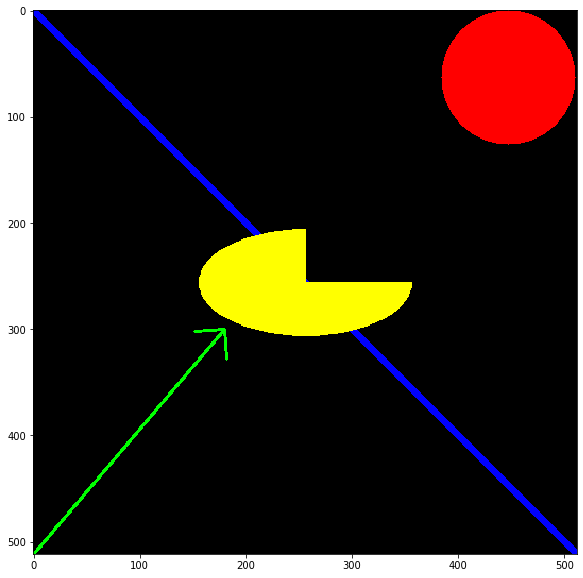

In [74]:
cv2.arrowedLine(img, (0, 512), (180,300), (0,255,0), 2)  
imshow(img)

## Полілінія

### Функція
Друкує еліпс
### Синтаксис функції
   cv2.PolyLine(img, pts, is_closed, color, thickness=1) 
   
Параметри:
* **img** – Вихідне зображення.
* **pts** – Масив координат полілінії.
* **is_closed** – Флаг, який показує чи замкнена полілінія, True або False.
* **color** – Колір.
* **thickness** – Товщина (за замовчанням 1).

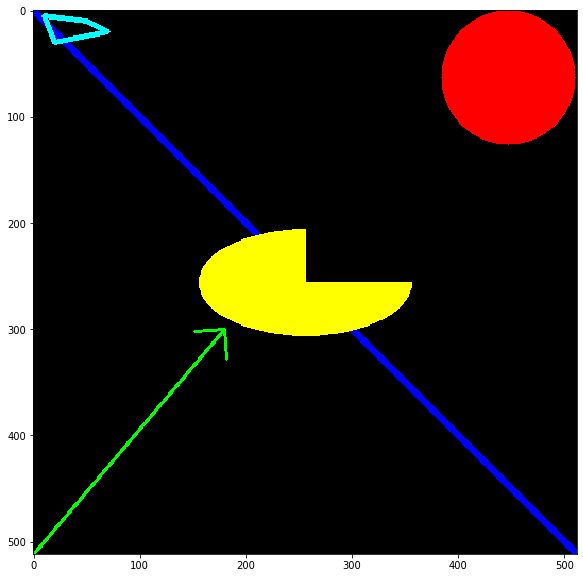

In [75]:
pts = np.array([[10,5],[20,30],[70,20],[50,10]], np.int32)
pts = pts.reshape((-1,1,2))
cv2.polylines(img,[pts],True,(0,255,255), 3)
imshow(img)

## Друк тексту на зображенні

### Функція
Друкує текст
### Синтаксис функції
   cv2.putText(img, text, org, fontFace, fontScale, color, thickness, lineType)
   
Параметри:
* **img** – Вихідне зображення.
* **text** – Текст для друку.
* **org** – Нижній лівий кут рядку з текстом.
* **color** – Колір.
* **fontFace** – Тип шрифту.
* **fontScale** - Масштаб шрифту
* **color** - Колір тексту
* **thickness** - Товщина тексту
* **lineType** - тип лінії (cv2.LINE_AA - згладжена лінія)

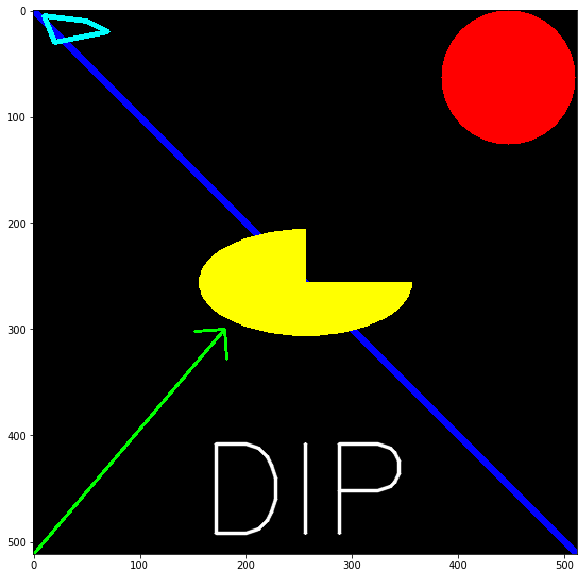

In [76]:
font = cv2.FONT_HERSHEY_SIMPLEX
text_x = int(img.shape[0]/2)-100
text_y = int(img.shape[1]) - 20
cv2.putText(img,'DIP',(text_x,text_y), font, 4,(255,255,255),2,cv2.LINE_AA)
imshow(img)

Більше інформації про примітиви графічних інструментів можна знайти за посиланням:
https://docs.opencv.org/2.4/modules/core/doc/drawing_functions.html#

## Виділення контурів на зображенні

### Зчитаємо вихідне зображення та перетворимо його на відтінки сірого

Оскільки модуль matplotlib має кольоровий простір BGR, то для коректного відображення зображення, його потрібно сконвертувати у кольоровий простір RGB. Цю операцію виконує функція **cv2.cvtColor**.

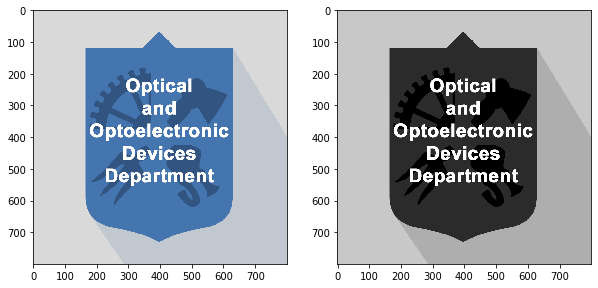

In [77]:
img = cv2.imread('assignments/ooep.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


plt.figure(figsize=(10, 10))

plt.subplot(121);
plt.imshow(img_rgb)

plt.subplot(122);
plt.imshow(imgray, cmap = 'gray')

### Застосуємо порогову обробку для зображення

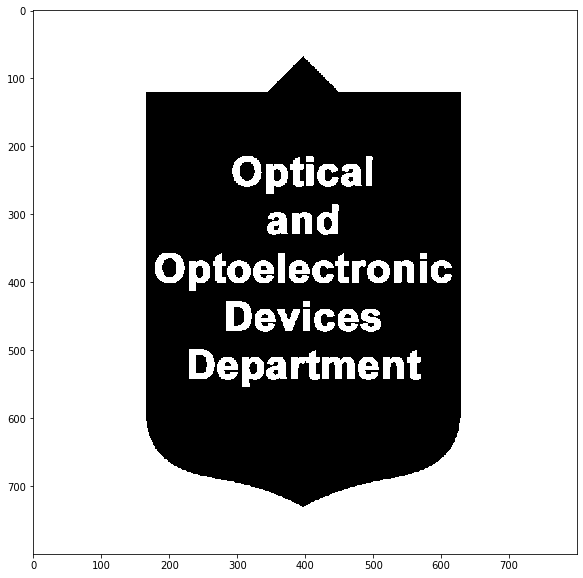

In [78]:
ret, thresh = cv2.threshold(imgray, 150, 255, 0)
imshow(thresh)

### Знайдемо контури на зображенні

### Функція
Знаходить контури на зображенні
### Синтаксис функції
   cv2.findContours(img, mode, method)
   
Параметри:
* **img** – Вихідне зображення.
* **mode** – один з чотирьох режимів угруповання знайдених контурів:
    * CV_RETR_LIST - видає все контури без угруповання;
    * CV_RETR_EXTERNAL - видає тільки крайні зовнішні контури;
    * CV_RETR_CCOMP - групує контури в дворівневу ієрархію. На верхньому рівні - зовнішні контури об'єкта. На другому рівні - контури отворів, якщо такі є. Всі інші контури потрапляють на верхній рівень;
    * CV_RETR_TREE - групує контури в багаторівневу ієрархію.
* **method** - один з трьох методів упаковки контурів:
    * CV_CHAIN_APPROX_NONE - упаковка відсутня і все контури зберігаються у вигляді відрізків, що складаються з двох пікселів;
    * CV_CHAIN_APPROX_SIMPLE - склеює всі горизонтальні, вертикальні і діагональні контури;
    * CV_CHAIN_APPROX_TC89_L1, CV_CHAIN_APPROX_TC89_KCOS - застосовує до контурів метод упаковки (апроксимації) Teh-Chin.

In [81]:
contours = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)[1]
print("Кількість знайдених контурів = " + str(len(contours)))

Кількість знайдених контурів = 64


### Надрукуємо контури на віхідному зображенні

### Функція
Друкує знайдені контури на зображенні
### Синтаксис функції
   cv2.drawContours(img, contours, index, color, thickness)
   
Параметри:
* **img** – Вихідне зображення.
* **contours** – знайдені контури на зображенні
* **index** - індекс контура, який слід надрукувати. Якщо -1, друкуються всі контури
* **color** - колір лінії контуру
* **thickness** - товщина лінії контуру

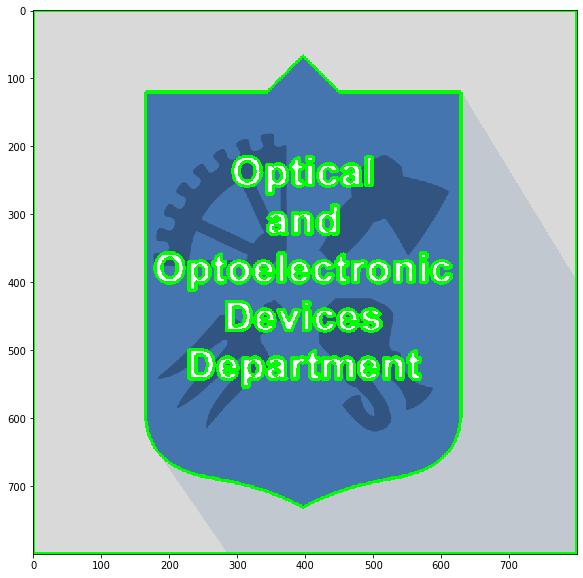

In [82]:
cv2.drawContours(img_rgb, contours, -1, (0, 255, 0), 3)
imshow(img_rgb)